In [1]:
# https://www.kaggle.com/a03102030/plant-pathology-2020-resnet50
#384
# 資料處理套件
import os
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd

import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns

In [2]:
# 設定顯示中文字體
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [3]:
#指定GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [4]:
# Keras深度學習模組套件
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [5]:
# tensorflow深度學習模組套件
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

#遷移式學習import
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications.vgg19 import VGG19
#B7
import efficientnet.tfkeras as efn
import tensorflow.keras.layers as L


from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
print(pd.__version__)
print(tf.__version__)

1.0.5
2.1.0


In [7]:
# 讀取資料集標籤檔
Sample_label = pd.read_csv("C:/Users/danie/AOI_test/test01.csv",encoding="utf8")
# 顯示資料集標籤檔
Sample_label.head()

,test_00000.png
0,test_00001.png
1,test_00002.png
2,test_00003.png
3,test_00004.png
4,test_00005.png


In [8]:
# 串接圖片檔的路徑
Sample_pics_path = os.path.join("C:/Users/danie/AOI_test/test_images")
# 讀取路徑中的圖片
train_mango_fnames = os.listdir(Sample_pics_path)

In [9]:
#測試圖片
print(train_mango_fnames[0])
print(train_mango_fnames[1])
print(train_mango_fnames[2])

test_00000.png
test_00001.png
test_00002.png


In [10]:
# 讀取圖檔
img = mpimg.imread("C:/Users/danie/AOI_test/test_images/test_00001.png")
# 查看資料型態
print(type(img))
# 顯示圖片的比例
print(img.shape)

<class 'numpy.ndarray'>
(512, 512)


In [11]:
# 把圖片的比例壓縮至800x800 
res = cv2.resize(img,(800,800),interpolation=cv2.INTER_LINEAR)
# 顯示壓縮後圖片的比例
res.shape

(800, 800)

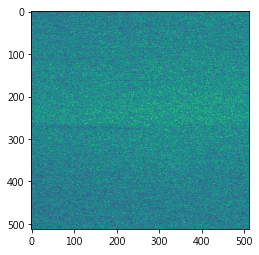

In [12]:
# 顯示原圖的芒果照片
plt.imshow(img)
plt.axis('on')
plt.show()

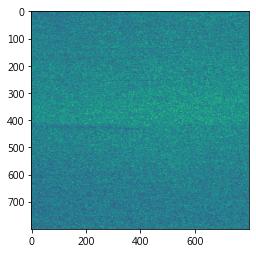

In [13]:
# 顯示壓縮過原圖的芒果照片
plt.imshow(res)
plt.axis('on')
plt.show()

In [14]:
# 製作標籤&資料集
csvfile = open('C:/Users/danie/AOI_test/test01.csv')
reader = csv.reader(csvfile)

In [15]:
# 讀取csv標籤
labels = []
for line in reader:
    tmp = [line[0]]
    # print tmp
    labels.append(tmp)

csvfile.close() 

In [16]:
picnum = len(labels)
print("AOI圖片數量: ",picnum)

AOI圖片數量:  10142


In [17]:
labels[8]

['test_00008.png']

In [18]:
X = []

In [19]:
# # 轉換圖片的標籤
# for i in range(len(labels)):
#     labels[i][1] = labels[i][1].replace("A","0")
#     labels[i][1] = labels[i][1].replace("B","1")
#     labels[i][1] = labels[i][1].replace("C","2")
# #測試是否有傳換成功
# print(labels[8])

In [20]:
# # 隨機讀取圖片
# a = 0
# items= []
# import random
# for a in range(0,45000):
#     items.append(a)
    
a = 0
items= []
for a in range(0,10142):
    items.append(a)
print(items[0])
print(labels[0])

0
['test_00000.png']


In [21]:
# # 製作訓練用資料集及標籤
# for i in random.sample(items,45000):
#     img = cv2.imread("C:/Users/danie/mango/C1-P2_Train Dev/Crop_Train/" + labels[i][0] )
#     res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
#     res = img_to_array(res)
#     X.append(res)    
#     y.append(labels[i][1])
# print("done")

# 製作訓練用資料集及標籤
for i in items:
    img = cv2.imread("C:/Users/danie/AOI_test/test_images/" + labels[i][0])
    res = cv2.resize(img,(512,512),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    X.append(res)
print("done")

done


In [22]:
img[0]

array([[191, 191, 191],
       [192, 192, 192],
       [192, 192, 192],
       ...,
       [182, 182, 182],
       [180, 180, 180],
       [180, 180, 180]], dtype=uint8)

In [23]:
print(len(X))

10142


In [24]:
# 轉換至array的格式
X = np.array(X)
print(X)
print(type(X))

[[[[185. 185. 185.]
   [182. 182. 182.]
   [175. 175. 175.]
   ...
   [175. 175. 175.]
   [188. 188. 188.]
   [199. 199. 199.]]

  [[184. 184. 184.]
   [181. 181. 181.]
   [174. 174. 174.]
   ...
   [182. 182. 182.]
   [189. 189. 189.]
   [195. 195. 195.]]

  [[183. 183. 183.]
   [179. 179. 179.]
   [173. 173. 173.]
   ...
   [189. 189. 189.]
   [190. 190. 190.]
   [191. 191. 191.]]

  ...

  [[239. 239. 239.]
   [248. 248. 248.]
   [255. 255. 255.]
   ...
   [132. 132. 132.]
   [139. 139. 139.]
   [146. 146. 146.]]

  [[231. 231. 231.]
   [242. 242. 242.]
   [254. 254. 254.]
   ...
   [143. 143. 143.]
   [143. 143. 143.]
   [144. 144. 144.]]

  [[221. 221. 221.]
   [233. 233. 233.]
   [248. 248. 248.]
   ...
   [151. 151. 151.]
   [145. 145. 145.]
   [143. 143. 143.]]]


 [[[185. 185. 185.]
   [164. 164. 164.]
   [186. 186. 186.]
   ...
   [191. 191. 191.]
   [161. 161. 161.]
   [151. 151. 151.]]

  [[170. 170. 170.]
   [195. 195. 195.]
   [171. 171. 171.]
   ...
   [163. 163. 163.]
 

In [25]:
# 轉換至float的格式
for i in range(len(X)):
    X[i] = X[i].astype('float32')

In [26]:
# 打映圖片訓練集的概況
# print(X[0])
print(type(X))
print(X.shape)

print(X[0].shape)
print(type(X[0]))

<class 'numpy.ndarray'>
(10142, 512, 512, 3)
(512, 512, 3)
<class 'numpy.ndarray'>


In [27]:
# # 將標籤轉換至float格式
# #y = tf.strings.to_number(y, out_type=tf.float32)
# for i in range(len(y)):
#     y[i] = y[i].astype('float32')
# print(y)

In [28]:
# # 打映圖片標籤的概況
# print(y[0])
# print(type(y[0]))

In [29]:
# # 標籤進行one-hotencoding
# y = np_utils.to_categorical(y, num_classes = 3)

In [30]:
# y[0]

In [31]:
x_test = X[:10142]

In [32]:
print(type(x_test))
print(len(x_test))
print(x_test.shape)
print(type(x_test[0]))

<class 'numpy.ndarray'>
10142
(10142, 512, 512, 3)
<class 'numpy.ndarray'>


In [33]:
# zca_whitening 對輸入數據施加ZCA白化
# rotation_range 數據提升時圖片隨機轉動的角度
# width_shift_range 圖片寬度的某個比例，數據提升時圖片水平偏移的幅度
# shear_range 剪切強度（逆時針方向的剪切變換角度）
# zoom_range 隨機縮放的幅度
# horizontal_flip 進行隨機水平翻轉
# fill_mode ‘constant’，‘nearest’，‘reflect’或‘wrap’之一，當進行變換時超出邊界的點將根據本參數給定的方法進行處理

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1/255,
    brightness_range=[0.5, 1.5])



# datagen = ImageDataGenerator(
#     zca_whitening=False,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     rescale=1/255, #多加的
#     brightness_range=[0.5, 1.5]
#     )



In [34]:
# 導入圖像增強參數
datagen.fit(x_test)
x_test = x_test/255
print('rescale！done!')

rescale！done!


In [35]:
modelEfficientB0 = tf.keras.models.load_model("C:/Users/danie/AOI_test/Model_H5/AOI_efficientB0_fortest_P1/weights-improvement-13-1.00.hdf5")
modelEfficientB0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 16, 16, 1280)      4049564   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 4,057,250
Trainable params: 4,015,234
Non-trainable params: 42,016
_________________________________________________________________


In [36]:
modelEfficientB1 = tf.keras.models.load_model("C:/Users/danie/AOI_test/Model_H5/AOI_efficientB1_fortest_P1/weights-improvement-15-0.99.hdf5")
modelEfficientB1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b1 (Model)      (None, 16, 16, 1280)      6575232   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 6,582,918
Trainable params: 6,520,870
Non-trainable params: 62,048
_________________________________________________________________


In [37]:
modelEfficientB2 = tf.keras.models.load_model("C:/Users/danie/AOI_test/Model_H5/AOI_efficientB2_fortest_P1/1010/weights-improvement-13-1.00.hdf5")
modelEfficientB2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b2 (Model)      (None, 16, 16, 1408)      7768562   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 8454      
Total params: 7,777,016
Trainable params: 7,709,448
Non-trainable params: 67,568
_________________________________________________________________


In [38]:
# B2_pred = modelEfficientB2.predict_classes(x_test)
# print("B2 down")

In [39]:
# print(B2_pred.shape)
# print(B2_pred[2])

In [40]:
# df_predB2  = pd.DataFrame(B2_pred,columns=['Label'])
# results = {'Label' : df_predB2.Label
#           }
# df_results_efficientnetB2 = pd.DataFrame(results)
# df_results_efficientnetB2.to_csv('submissionEfficientNetB2.csv',index=False)

In [42]:
#print(df_results_efficientnetB2)

In [43]:
modelEfficientB3 = tf.keras.models.load_model("C:/Users/danie/AOI_test/Model_H5/AOI_efficientB3_fortest_P1/weights-improvement-13-1.00.hdf5")
modelEfficientB3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Model)      (None, 16, 16, 1536)      10783528  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9222      
Total params: 10,792,750
Trainable params: 10,705,454
Non-trainable params: 87,296
_________________________________________________________________


In [ ]:
# B3_pred = modelEfficientB3.predict_classes(x_test)
# print("B3 down")

In [ ]:
# print(B3_pred.shape)
# print(B3_pred[2])

In [ ]:
# df_predB3  = pd.DataFrame(B3_pred,columns=['Label'])
# results = {'Label' : df_predB3.Label
#           }
# df_results_efficientnetB3 = pd.DataFrame(results)
# df_results_efficientnetB3.to_csv('submissionEfficientNetB3.csv',index=False)

In [44]:
modelEfficientB4 = tf.keras.models.load_model("C:/Users/danie/AOI_test/Model_H5/AOI_efficientB4_fortest_P1/weights-improvement-12-1.00.hdf5")
modelEfficientB4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b4 (Model)      (None, 16, 16, 1792)      17673816  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 10758     
Total params: 17,684,574
Trainable params: 17,559,374
Non-trainable params: 125,200
_________________________________________________________________


In [ ]:
# B4_pred = modelEfficientB4.predict_classes(x_test)
# print("B4 down")

In [ ]:
# df_predB4  = pd.DataFrame(B4_pred,columns=['Label'])
# results = {'Label' : df_predB4.Label
#           }
# df_results_efficientnetB4 = pd.DataFrame(results)
# df_results_efficientnetB4.to_csv('submissionEfficientNetB4.csv',index=False)

In [45]:
modelEfficientB5 = tf.keras.models.load_model("C:/Users/danie/AOI_test/Model_H5/AOI_efficientB5_fortest_P1/weights-improvement-14-1.00.hdf5")
modelEfficientB5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b5 (Model)      (None, 16, 16, 2048)      28513520  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 28,525,814
Trainable params: 28,353,078
Non-trainable params: 172,736
_________________________________________________________________


In [ ]:
# B5_pred = modelEfficientB5.predict_classes(x_test)
# print("B5 down")

In [ ]:
# df_predB5  = pd.DataFrame(B5_pred,columns=['Label'])
# results = {'Label' : df_predB5.Label
#           }
# df_results_efficientnetB5 = pd.DataFrame(results)
# df_results_efficientnetB5.to_csv('submissionEfficientNetB5.csv',index=False)

In [46]:
modelEfficientB7 = tf.keras.models.load_model("C:/Users/danie/AOI_test/Model_H5/AOI_efficientB5_fortest_P1/weights-improvement-14-1.00.hdf5")
modelEfficientB7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b5 (Model)      (None, 16, 16, 2048)      28513520  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 28,525,814
Trainable params: 28,353,078
Non-trainable params: 172,736
_________________________________________________________________


### 取平均

In [ ]:
# df_predictions = round(0.33 * df_results_efficientnetB3 + 0.33 * df_results_efficientnetB4 + 0.34 * df_results_efficientnetB5)
# df_pred  = pd.DataFrame(df_predictions,columns=['Label'])
# results = {'Label' : df_pred.Label
#           }
# df_results_Ensemble = pd.DataFrame(results)
# df_results_Ensemble.to_csv('submissionEnsemble.csv',index=False)

### 投票

In [47]:
model_voting = []
model_voting.append(modelEfficientB7)
model_voting.append(modelEfficientB5)
model_voting.append(modelEfficientB4)
model_voting.append(modelEfficientB3)
model_voting.append(modelEfficientB2)
model_voting.append(modelEfficientB1)
model_voting.append(modelEfficientB0)

In [48]:
labels_voting = []
for m in model_voting:
    predicts = np.argmax(m.predict(x_test),axis=1)
    print("predict ok")
    labels_voting.append(predicts)
    print("down")

predict ok
down
predict ok
down
predict ok
down
predict ok
down
predict ok
down
predict ok
down
predict ok
down


In [49]:
print(labels_voting)

[array([1, 2, 5, ..., 1, 3, 1], dtype=int64), array([1, 2, 5, ..., 1, 3, 1], dtype=int64), array([1, 2, 5, ..., 1, 3, 1], dtype=int64), array([1, 2, 5, ..., 1, 3, 1], dtype=int64), array([1, 2, 5, ..., 1, 3, 1], dtype=int64), array([1, 2, 5, ..., 1, 3, 1], dtype=int64), array([1, 2, 5, ..., 1, 3, 1], dtype=int64)]


In [50]:
import scipy
#Ensemble with voting
labels_voting = np.array(labels_voting)
print(labels_voting)


[[1 2 5 ... 1 3 1]
 [1 2 5 ... 1 3 1]
 [1 2 5 ... 1 3 1]
 ...
 [1 2 5 ... 1 3 1]
 [1 2 5 ... 1 3 1]
 [1 2 5 ... 1 3 1]]


In [51]:
labels_voting = np.transpose(labels_voting, (1, 0))
print(labels_voting)

[[1 1 1 ... 1 1 1]
 [2 2 2 ... 2 2 2]
 [5 5 5 ... 5 5 5]
 ...
 [1 1 1 ... 1 1 1]
 [3 3 3 ... 3 3 3]
 [1 1 1 ... 1 1 1]]


In [52]:
labels = labels_voting
print(labels)

[[1 1 1 ... 1 1 1]
 [2 2 2 ... 2 2 2]
 [5 5 5 ... 5 5 5]
 ...
 [1 1 1 ... 1 1 1]
 [3 3 3 ... 3 3 3]
 [1 1 1 ... 1 1 1]]


In [53]:
labels_voting = scipy.stats.mode(labels_voting, axis=1)[0]
print(labels_voting)
# labels = scipy.stats.mode(labels, axis=1)
# print(labels)

[[1]
 [2]
 [5]
 ...
 [1]
 [3]
 [1]]


In [54]:
labels_voting = np.squeeze(labels_voting)
print(labels_voting)

[1 2 5 ... 1 3 1]


In [55]:
output = pd.DataFrame(labels_voting)
output.to_csv('voting_submission02.csv',index=False)
#pd.DataFrame({'ImageId' : np.arange(1, predicts.shape[0] + 1), 'Label' : labels_voting }).to_csv('voting_submission.csv', index=False)